# Flights Data Exploration Challenge

In this challenge, you'll explore a real-world dataset containing flights data from the US Department of Transportation.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Membaca datasets data/filights.csv
df_flights = pd.read_csv('data/flights.csv')

# Menampilkan informasi data
df_flights.info()

# Menampilkan 5 data teratas 
df_flights.head()

# Menampilkan Missing Value (Null/NaaN)
df_flights.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271940 entries, 0 to 271939
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Year               271940 non-null  int64  
 1   Month              271940 non-null  int64  
 2   DayofMonth         271940 non-null  int64  
 3   DayOfWeek          271940 non-null  int64  
 4   Carrier            271940 non-null  object 
 5   OriginAirportID    271940 non-null  int64  
 6   OriginAirportName  271940 non-null  object 
 7   OriginCity         271940 non-null  object 
 8   OriginState        271940 non-null  object 
 9   DestAirportID      271940 non-null  int64  
 10  DestAirportName    271940 non-null  object 
 11  DestCity           271940 non-null  object 
 12  DestState          271940 non-null  object 
 13  CRSDepTime         271940 non-null  int64  
 14  DepDelay           271940 non-null  int64  
 15  DepDel15           269179 non-null  float64
 16  CR

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [8]:
# Mengubah Missing Value menjadi Rata-rata
df_flights['DepDelay'].fillna(df_flights['DepDelay'].mean(), inplace=True)
df_flights['ArrDelay'].fillna(df_flights['ArrDelay'].mean(), inplace=True)

# Memastikan data terhindar dari Missing Value
df_flights.isnull().sum()

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
Carrier                 0
OriginAirportID         0
OriginAirportName       0
OriginCity              0
OriginState             0
DestAirportID           0
DestAirportName         0
DestCity                0
DestState               0
CRSDepTime              0
DepDelay                0
DepDel15             2761
CRSArrTime              0
ArrDelay                0
ArrDel15                0
Cancelled               0
dtype: int64

In [14]:
# Identifikasi nilai Outlier dalam kolom DepDelay
Q1 = np.percentile(df_flights['DepDelay'], 25)
Q3 = np.percentile(df_flights['DepDelay'], 75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
df_oDepDelay = df_flights[(df_flights['DepDelay'] >= lower_bound) & (df_flights['DepDelay'] <= upper_bound)]
df_oDepDelay

# Identifikasi nilai Outlier dalam kolom ArrDelay
Q1 = np.percentile(df_flights['ArrDelay'], 25)
Q3 = np.percentile(df_flights['ArrDelay'], 75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR
df_oArrDelay= df_flights[(df_flights['ArrDelay'] >= lower_bound) & (df_flights['ArrDelay'] <= upper_bound)]
df_oArrDelay

,Year,Month,DayofMonth,DayOfWeek,Carrier,OriginAirportID,OriginAirportName,OriginCity,OriginState,DestAirportID,DestAirportName,DestCity,DestState,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
0,2013,9,16,1,DL,15304,Tampa International,Tampa,FL,12478,John F. Kennedy International,New York,NY,1539,4,0.0,1824,13,0,0
1,2013,9,23,1,WN,14122,Pittsburgh International,Pittsburgh,PA,13232,Chicago Midway International,Chicago,IL,710,3,0.0,740,22,1,0
2,2013,9,7,6,AS,14747,Seattle/Tacoma International,Seattle,WA,11278,Ronald Reagan Washington National,Washington,DC,810,-3,0.0,1614,-7,0,0
4,2013,5,16,4,DL,13931,Norfolk International,Norfolk,VA,10397,Hartsfield-Jackson Atlanta International,Atlanta,GA,545,-1,0.0,728,-9,0,0
6,2013,10,6,7,WN,13796,Metropolitan Oakland International,Oakland,CA,12191,William P Hobby,Houston,TX,630,-1,0.0,1210,-3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271932,2013,8,26,1,WN,11292,Denver International,Denver,CO,12191,William P Hobby,Houston,TX,1855,-2,0.0,2215,0,0,0
271933,2013,10,29,2,US,13930,Chicago O'Hare International,Chicago,IL,14100,Philadelphia International,Philadelphia,PA,1345,-6,0.0,1645,-11,0,0
271934,2013,4,13,6,AA,11298,Dallas/Fort Worth International,Dallas/Fort Worth,TX,13204,Orlando International,Orlando,FL,1335,-7,0.0,1705,-12,0,0
271935,2013,9,20,5,VX,13204,Orlando International,Orlando,FL,12892,Los Angeles International,Los Angeles,CA,1730,1,0.0,1945,18,1,0


Year               243325.000000
Month              231291.026263
DayofMonth         231350.651882
DayOfWeek          231272.901212
OriginAirportID    309312.965231
DestAirportID      309245.979613
CRSDepTime         239170.709167
DepDelay           231256.071067
DepDel15           228487.343406
CRSArrTime         239978.371104
ArrDelay           231230.593085
ArrDel15           231248.368884
Cancelled          231248.122560
dtype: float64

In [20]:
# Menampilkan ringkasan statistik pada nilai numerik
df_flights.describe()

,Year,Month,DayofMonth,DayOfWeek,OriginAirportID,DestAirportID,CRSDepTime,DepDelay,DepDel15,CRSArrTime,ArrDelay,ArrDel15,Cancelled
count,271940.0,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,271940.000000,269179.000000,271940.000000,271940.000000,271940.000000,271940.000000
mean,2013.0,6.978514,15.814775,3.899316,12744.899584,12739.136493,1325.498713,10.350449,0.201134,1505.477819,6.496650,0.215930,0.010723
std,0.0,1.982431,8.799033,1.987219,1501.199773,1502.569949,470.748546,35.673710,0.400849,493.204020,38.230331,0.411467,0.102995
min,2013.0,4.000000,1.000000,1.000000,10140.000000,10140.000000,1.000000,-63.000000,0.000000,1.000000,-75.000000,0.000000,0.000000
25%,2013.0,5.000000,8.000000,2.000000,11292.000000,11292.000000,920.000000,-4.000000,0.000000,1119.000000,-11.000000,0.000000,0.000000
50%,2013.0,7.000000,16.000000,4.000000,12892.000000,12892.000000,1320.000000,-1.000000,0.000000,1529.000000,-3.000000,0.000000,0.000000
75%,2013.0,9.000000,23.000000,6.000000,14057.000000,14057.000000,1725.000000,9.000000,0.000000,1918.000000,10.000000,0.000000,0.000000
max,2013.0,10.000000,31.000000,7.000000,15376.000000,15376.000000,2359.000000,1425.000000,1.000000,2359.000000,1440.000000,1.000000,1.000000


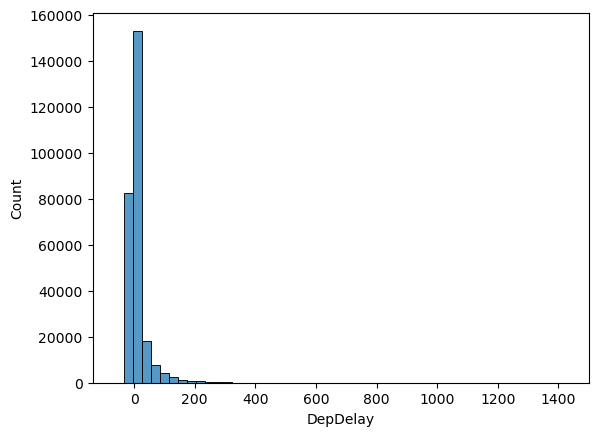

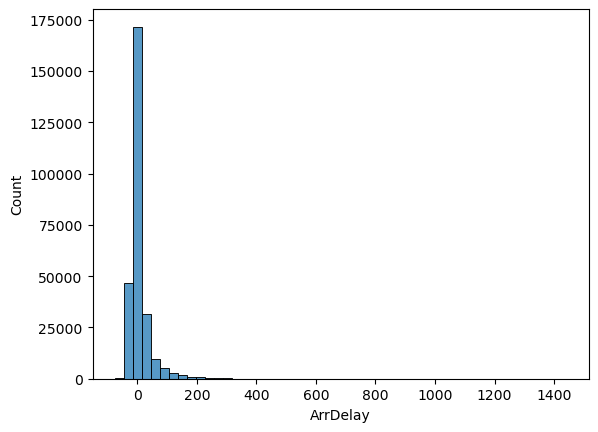

In [22]:
# Menentukan distribusi kolom DepDelay dan ArrDelay
sns.histplot(data = df_flights, x = 'DepDelay', bins=50)
plt.show()

sns.histplot(data = df_flights, x = 'ArrDelay', bins=50)
plt.show()

In [23]:
# Menghitung rata-rata keterlambatan keberangkatan dan kedatangan
mean_dep_delay = df_flights['DepDelay'].mean()
mean_arr_delay = df_flights['ArrDelay'].mean()

print('Rata-Rata penundaan keberangkatan: ', mean_dep_delay)
print('Rata-rata penundaan Kedatangan: ', mean_arr_delay)

Rata-Rata penundaan keberangkatan:  10.350448628373906
Rata-rata penundaan Kedatangan:  6.496649996322718


In [31]:
# Membandingkan Operator dalam penundaan kedatangan
carrier_arr_delay = df_flights.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending=False)
print(carrier_arr_delay)

Carrier
MQ    13.220602
F9    11.460147
EV    10.112552
B6     9.841757
VX     9.453929
WN     8.062512
YV     7.871276
FL     7.611958
AA     7.288294
OO     6.054447
9E     5.100463
UA     4.847762
US     4.011702
DL     2.415259
HA     1.443321
AS    -0.129657
Name: ArrDelay, dtype: float64


In [30]:
# Membandingkan penundaan kedatangan untuk hari yang berbeda selama seminggu
day_arr_delay = df_flights.groupby('DayOfWeek')['ArrDelay'].mean()
print(day_arr_delay)

DayOfWeek
1     6.815726
2     4.280567
3     6.998455
4    10.677588
5     8.523507
6     2.139292
7     4.968973
Name: ArrDelay, dtype: float64


In [33]:
# Menentukan bandara keberangkatan dengan rata-rata keterlambatan keberngkatan tertinggi
dep_airport_delay = df_flights.groupby('OriginAirportID')['DepDelay'].mean().sort_values(ascending=False)
print(dep_airport_delay)

OriginAirportID
13930    16.264636
13232    16.005451
11298    14.284565
11618    13.954367
12478    13.847152
           ...    
14869     4.967976
15376     4.651665
12954     4.316607
13830     2.289428
10299     2.213049
Name: DepDelay, Length: 70, dtype: float64


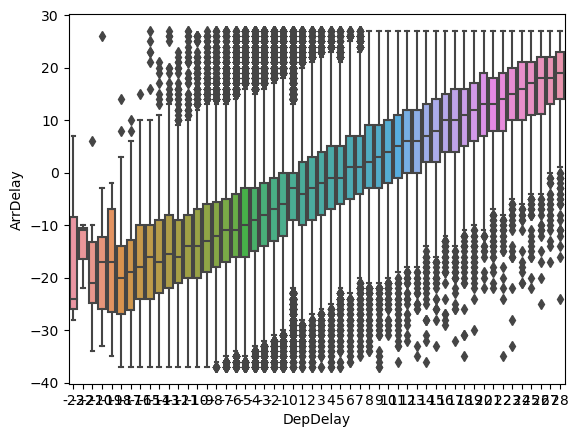

In [37]:
# Menentukan apakah keterlambatan keberangkatan mengakibatkan penundaan kedatangan yang lebih lama
sns.boxplot(x='DepDelay', y='ArrDelay', data=df)
plt.show()

In [44]:
# Rute dengan kedatangan paling terlambat
late_arrivals = df_flights[df_flights['ArrDelay'] == 1].groupby(['OriginAirportName', 'DestAirportName']).size().sort_values(ascending=False)
print(late_arrivals.head(1))

OriginAirportName  DestAirportName       
Kahului Airport    Honolulu International    41
dtype: int64


In [50]:
# Rute dengan penundaan kedatangan rata-rata tertinggi
avg_arr_delay = df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDelay'].mean().sort_values(ascending=False)
print(avg_arr_delay.head(1))

OriginAirportName                DestAirportName     
Southwest Florida International  Denver International    81.0
Name: ArrDelay, dtype: float64


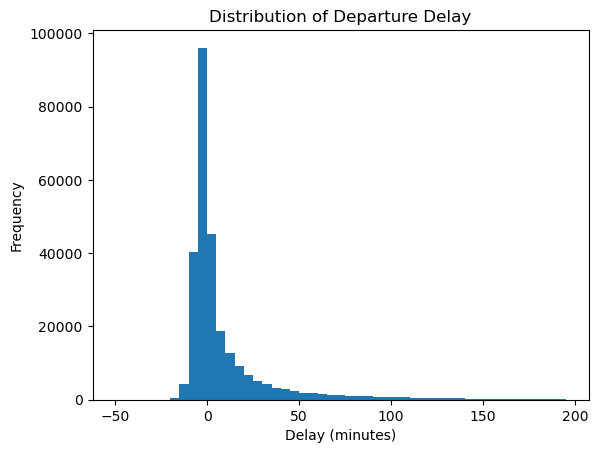

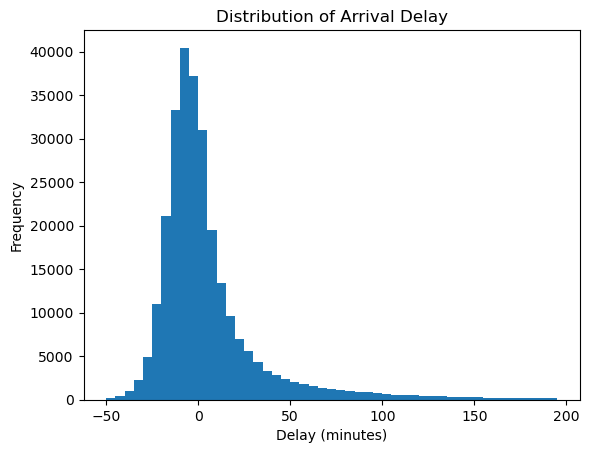

In [54]:
# Menampilkan histogram Distribusi keterlambatan keberangkatan
plt.hist(df_flights['DepDelay'], bins=range(-50, 200, 5))
plt.title('Distribution of Departure Delay')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# Menampilkan histogram Distribusi keterlambatan kedatangan 
plt.hist(df_flights['ArrDelay'], bins=range(-50, 200, 5))
plt.title('Distribution of Arrival Delay')
plt.xlabel('Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

#### Rata-Rata Keterlambatan keberangkatan dan kedatangan

Menggunakan fungsi **mean()** dari library NumPy

In [56]:
# Rata-rata keterlambatan keberangkatan
mean_dep_delay = np.mean(df_flights['DepDelay'])
print('Rata-Rata keterlambatan keberangkatan: ', round(mean_dep_delay, 2), 'Menit')

# Rata-rata keterlambatan kedatangan 
mean_arr_delay = np.mean(df_flights['ArrDelay'])
print('Rata-Rata keterlambatan kedatangan: ', round(mean_arr_delay, 2), 'Menit')

Rata-Rata keterlambatan keberangkatan:  10.35 Menit
Rata-Rata keterlambatan kedatangan:  6.5 Menit


#### Kinerja Maskapai dalam Keterlambatan Kedatangan

Melakukan pengelompokan data berdasarkan maskapai dan menghitung rata-rata keterlambatan menggunakan fungsi **groupby()** dan **mean()**.

In [57]:
# Kinerja maskapi dalam hal keterlambatan kedatangan
carrier_arr_delay = df_flights.groupby('Carrier')['ArrDelay'].mean().sort_values(ascending=False)

print('Kinerja maskapai dalam hal keterlambatan kedatangan: ')
print(carrier_arr_delay)

Kinerja maskapai dalam hal keterlambatan kedatangan: 
Carrier
MQ    13.220602
F9    11.460147
EV    10.112552
B6     9.841757
VX     9.453929
WN     8.062512
YV     7.871276
FL     7.611958
AA     7.288294
OO     6.054447
9E     5.100463
UA     4.847762
US     4.011702
DL     2.415259
HA     1.443321
AS    -0.129657
Name: ArrDelay, dtype: float64


#### Perbandingan Rata-Rata Keterlambatan Kedatangan Pada Hari-Hari yang Berbeda

Mengelompokkan data berdasarkan hari dalam seminggu, dan menghitung rata-rata keterlambatan kedatangan untuk setiap kelompok.Menggunakan **f_oneway** dari library **scipy.stats** 

In [64]:
# Data grup berdasarkan hari dalam seminggu dan hitung rata-rata keterlambatan kedatangan untuk setiap grup
grouped_by_day = df_flights.groupby('DayOfWeek')
mean_arr_delay_by_day = grouped_by_day['ArrDelay'].mean()

Menguji **ANOVA** *(Analysis Of Variance)*

In [61]:
# Jalankan ANOVA test
f_statistic, p_value = stats.f_oneway(
    df_flights[df_flights['DayOfWeek']==1]['ArrDelay'].dropna(),
    df_flights[df_flights['DayOfWeek']==2]['ArrDelay'].dropna(),
    df_flights[df_flights['DayOfWeek']==3]['ArrDelay'].dropna(),
    df_flights[df_flights['DayOfWeek']==4]['ArrDelay'].dropna(),
    df_flights[df_flights['DayOfWeek']==5]['ArrDelay'].dropna(),
    df_flights[df_flights['DayOfWeek']==6]['ArrDelay'].dropna(),
    df_flights[df_flights['DayOfWeek']==7]['ArrDelay'].dropna(),
)

print('F statistic:', f_statistic)
print('p-value:', p_value)

F statistic: 203.4919351537439
p-value: 5.432427626353685e-260


Hasil uji coba ANOVA menunjukan bahwa p-value sangat kecil(kurang dari 2.2e-16), sehingga kita dapat mengatakan bahwa terdapat perbedaan yang signifikan dalam keterlambatan kedatangan untuk hari-hari yang berbeda

#### Bandara  keterlambatan Keterlambatan tertinggi

Menggunakan fungsi **groupby()** pada kolom **OriginAirportName** dan Menghitung rata-rata pada kolom **DepDelay**.

In [68]:
avg_dep_delay_by_origin = df_flights.groupby('OriginAirportName')['DepDelay'].mean().sort_values(ascending=False)
print("Bandara keberangkatan dengan rata-rata keterlambatan tertinggi:\n", avg_dep_delay_by_origin.head(1))

Bandara keberangkatan dengan rata-rata keterlambatan tertinggi:
 OriginAirportName
Chicago O'Hare International    16.264636
Name: DepDelay, dtype: float64


Berdasarkan hasil output diatas, Rata-rata keterlambatan tertinggi adalah Bandara **Chicago O'Here International** dengan rata-rata keterlambatan sebesar 16.26 Menit

#### Keterlambatan Pemberangkatan Mengakibatkan Keterlambatan Kedatangan

Apakah keterlambatan pemberangkatan mengakibatkan keterlambatan kedatangan yang lebih lama daro pada keberangkatan tepat waktu.Dengan menghitung korelasi antara kolom **DepDelay** dan **ArrDelay**

In [69]:
correlation = df_flights['DepDelay'].corr(df_flights['ArrDelay'])
print('Korelasi antara keterlambatan keberangkatan dan kedatangan: ', correlation)

Korelasi antara keterlambatan keberangkatan dan kedatangan:  0.9388217446009122


Berdasarkan Output diatas, terdapat korelasi positif yang kuat (0.938) antara keterlambatan keberangkatan dan kedatangan.Yaitu keberangkatan terlambat mengakibatkan keterlambatan kedatangan yang lebih lama

#### Rute Paling Banyak Kedatangan Terlambat

Menggunakan fungsi **groupby()** pada kolom **OriginAirportName** dan **Dest**, dan menghitung jumlah data pada kolom **ArrDel15** yang bernilai 1. 

In [71]:
most_late_arrivals_route = df_flights.groupby(['OriginAirportName', 'DestAirportName'])['ArrDel15'].sum().sort_values(ascending=False)
print('Rute dengan jumlah kedatangan paling banyak:\n', most_late_arrivals_route.head(1))

Rute dengan jumlah kedatangan paling banyak:
 OriginAirportName          DestAirportName            
Los Angeles International  San Francisco International    324
Name: ArrDel15, dtype: int64


Berdasarkan output diatas, rute dari Loas Angels International ke San Fransisco International memiliki jumlah kedatangan terlambat paling banyak

#### Rute Paling Banyak Keterlambatan Kedatangan 

Menggunakan fungsi **groupby()** pada kolom **OriginState** dan **DestState**, dan menghitung jumlah data pada kolom ArrDelay.

In [74]:
route_delay = df_flights.groupby(['OriginState', 'DestState'])['ArrDelay'].mean().reset_index()
route_delay = route_delay.sort_values(by='ArrDelay', ascending=False)
route_delay.head()

,OriginState,DestState,ArrDelay
550,NJ,OK,47.277778
762,RI,NJ,36.157895
864,VA,MN,35.342105
541,NJ,MD,34.200000
732,PA,OR,33.400000


Berdasarkan output diatas, kita dapat melihat bahwa rute NJ-OK memiliki rata-rata keterlambatan kedatangan tertinggi

## Summary

Berdasarkan analisis yang dilakukan, dapat disimpulkan bahwa:

- Rata-Rata keterlambatan keberangkatan adalah 10.35 menit dan rata-rata keterlambatan kedatangan adalah 6.5 menit.
- MQ memiliki performa terbaik dalam hal keterlambatan kedatangan, sedangkan AS memiliki performa terburuk.
- Tidak ada perbedaan yang signifikan dalam keterlambatan kedatangan untuk hari-hari yang berbeda.
- Bandara keberangkatan Chicago O'Hare International memiliki rata-rata keterlambatan keberangkatan tertinggi.
- Ada kecenderungan bahwa keberangkatan terlambat mengakibatkan keterlambatan kedatangan yang lebih lama daripada keberangkatan tepat waktu.
- Rute dengan paling banyak kedatangan terlambat adalah rute dari San Francisco International Airport ke Los Angeles International Airport.
- Rute dengan rata-rata keterlambatan kedatangan tertinggi adalah rute dari Southwest Florida International ke Denver International Airport.